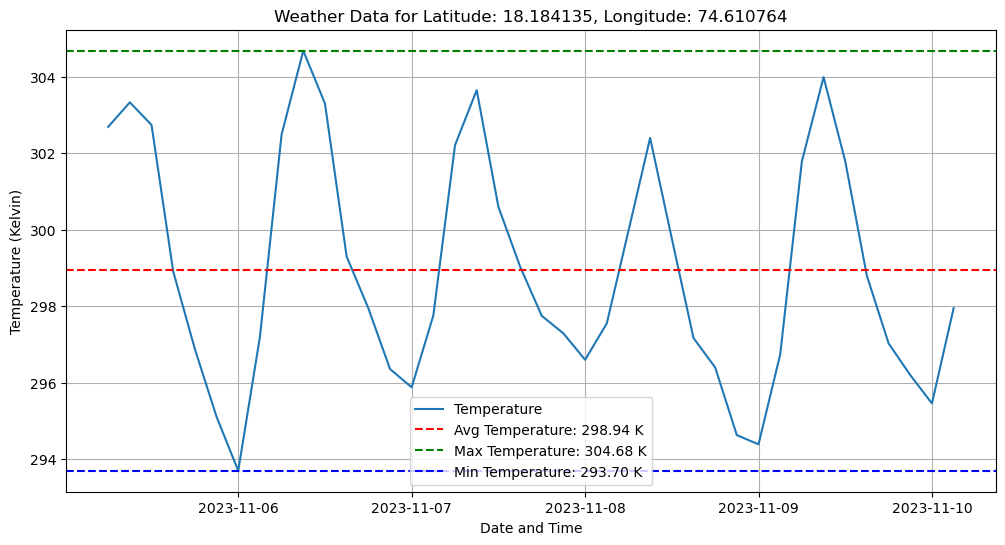

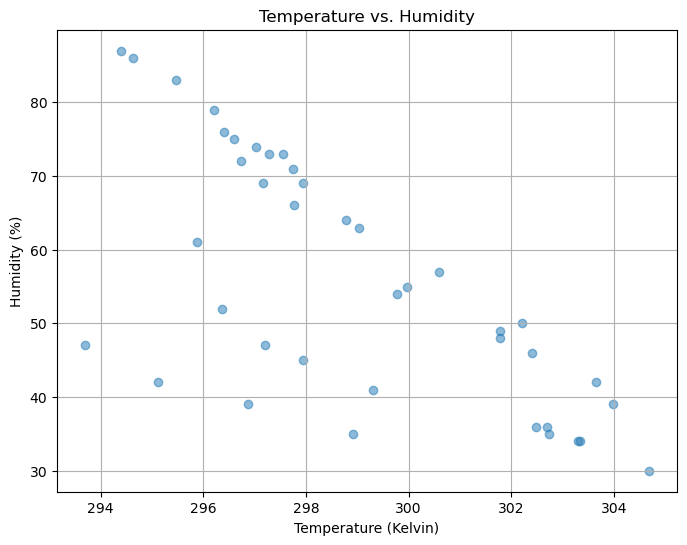

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'
lat = 18.184135  # Replace with your desired latitude
lon = 74.610764  # Replace with your desired longitude

# Construct the API URL
url = f'http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}'

# Make the API request
response = requests.get(url)

if response.status_code == 200:
    weather_data = response.json()
    
    # Extract and preprocess relevant data
    data_list = weather_data['list']
    df = pd.DataFrame(data_list)
    
    # Convert timestamp to datetime
    df['dt'] = pd.to_datetime(df['dt'], unit='s')
    
    # Extract temperature and humidity columns
    df['temperature'] = df['main'].apply(lambda x: x['temp'])
    df['humidity'] = df['main'].apply(lambda x: x['humidity'])
    
    # Data Modeling
    average_temperature = df['temperature'].mean()
    max_temperature = df['temperature'].max()
    min_temperature = df['temperature'].min()
    
    # Data Visualization
    plt.figure(figsize=(12, 6))
    
    # Line chart for temperature trends
    plt.plot(df['dt'], df['temperature'], label='Temperature')
    
    plt.title(f'Weather Data for Latitude: {lat}, Longitude: {lon}')
    plt.xlabel('Date and Time')
    plt.ylabel('Temperature (Kelvin)')
    
    # Display average, max, and min temperatures
    plt.axhline(average_temperature, color='r', linestyle='--', label=f'Avg Temperature: {average_temperature:.2f} K')
    plt.axhline(max_temperature, color='g', linestyle='--', label=f'Max Temperature: {max_temperature:.2f} K')
    plt.axhline(min_temperature, color='b', linestyle='--', label=f'Min Temperature: {min_temperature:.2f} K')
    
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
    # Scatterplot for temperature vs. humidity
    plt.figure(figsize=(8, 6))
    
    plt.scatter(df['temperature'], df['humidity'], alpha=0.5)
    
    plt.title('Temperature vs. Humidity')
    plt.xlabel('Temperature (Kelvin)')
    plt.ylabel('Humidity (%)')
    
    plt.grid(True)
    
    plt.show()
    
else:
    print(f"API request failed with status code {response.status_code}")
